In [ ]:
#  import sys
#  !{sys.executable} -m pip install pandas
#  !{sys.executable} -m pip install numpy
#  !{sys.executable} -m pip install matplotlib
#  !{sys.executable} -m pip install sklearn
#  !{sys.executable} -m pip install scipy
#  !{sys.executable} -m pip install kneed
# !{sys.executable} -m pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from __future__ import print_function
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

In [2]:
dataset = pd.read_csv(r"MoviesOnStreamingPlatforms_updated.csv")
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# Prečišćavanje dataseta

## brisanje nepotpunih vrsta

In [3]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [4]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## konverzija atributa Year u kategoričke vrednosti. 

In [5]:
dataset.Year=pd.to_numeric(dataset.Year)
for i in range(dataset.shape[0]):
    if dataset.Year[i]<1990:
        dataset.Year[i]=0
    else:
        dataset.Year[i]=1

<ipython-input-5-eba6b6ab8a2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Year[i]=1
<ipython-input-5-eba6b6ab8a2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Year[i]=0


In [6]:
dataset.head()


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,1,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [7]:
runtime_mean = dataset.Runtime.mean()
dataset['Runtime']=pd.to_numeric(dataset['Runtime'],errors='coerce')
for i in range(dataset.shape[0]):
    if dataset.Runtime[i]<=runtime_mean:
        dataset.Runtime[i]=0
    else:
        dataset.Runtime[i]=1

<ipython-input-7-16c93985c5e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Runtime[i]=1
<ipython-input-7-16c93985c5e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Runtime[i]=0


In [8]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,1,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",1.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,1.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,1.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,1.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,1.0


In [9]:
def clean(column_name):
    """Make list from all values in column."""
    name = set()
    for name_string in dataset[column_name]:
        name.update(name_string.split(','))
    name = sorted(name)
    return name


def top(column_name):
    """Sorted list from column."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    return nlt.index


def plot_column(column_name, n_elem_display=0):
    """ Plot the most frequently values in column."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    if n_elem_display != 0:
        return nlt[:n_elem_display].plot(kind="bar", figsize=(10, 10))
    else:
        return nlt[:].plot(kind="bar", figsize=(10, 5))

<AxesSubplot:>

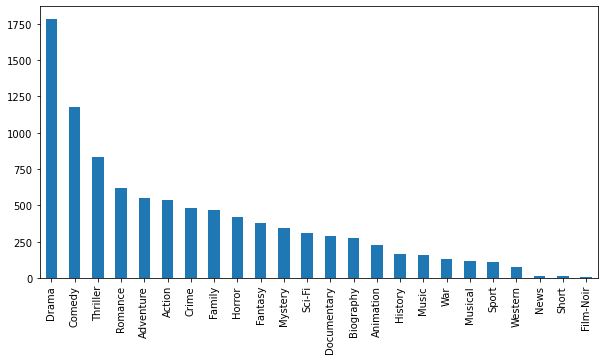

In [10]:
plot_column('Genres')

In [11]:
genres=clean('Genres')
for genre in genres:
    dataset["Genre:"+genre] = [int(genre in g.split(',')) for g in dataset.Genres]

In [12]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Genre:Musical,Genre:Mystery,Genre:News,Genre:Romance,Genre:Sci-Fi,Genre:Short,Genre:Sport,Genre:Thriller,Genre:War,Genre:Western
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

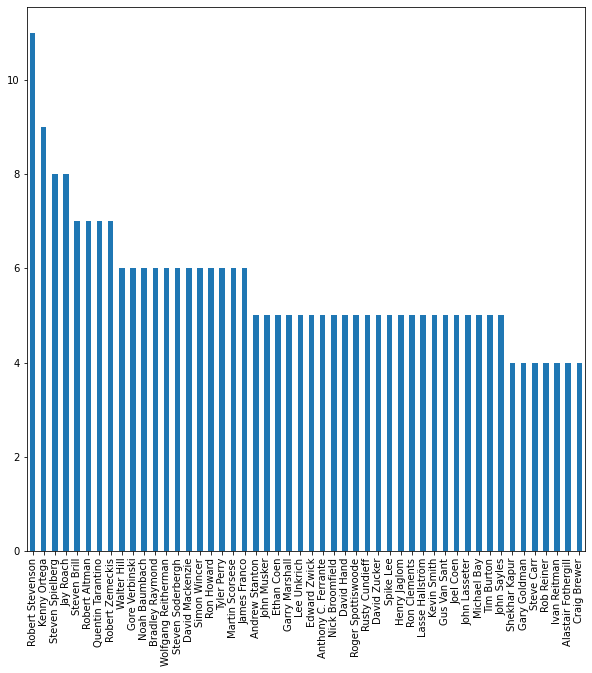

In [13]:
plot_column('Directors',50)

In [14]:
directors=top('Directors')
    
for director in directors[:50]:
    dataset["Director:"+director] = [int(director in d.split(',')) for d in dataset.Directors]

In [15]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Director:Michael Bay,Director:Tim Burton,Director:John Sayles,Director:Shekhar Kapur,Director:Gary Goldman,Director:Steve Carr,Director:Rob Reiner,Director:Ivan Reitman,Director:Alastair Fothergill,Director:Craig Brewer
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

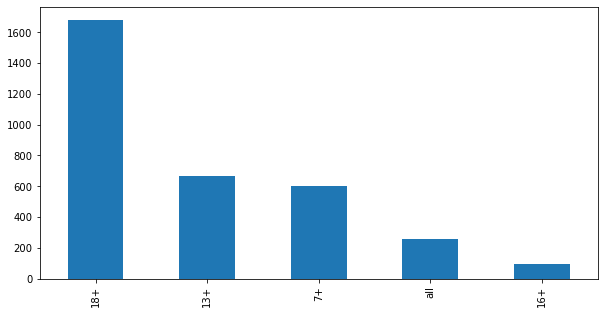

In [16]:
plot_column('Age')

In [17]:
ages=top('Age')
dataset['Age:18+']=np.nan
dataset['Age:13+']=np.nan
dataset['Age:7+']=np.nan
dataset['Age:16+']=np.nan

for i in range(dataset.shape[0]):
    if dataset.Age[i] == '18+':
        dataset['Age:18+'][i] = 1
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 0
        
    if dataset.Age[i] == '13+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 1
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 0
        
    if dataset.Age[i] == '7+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 1
        dataset['Age:16+'][i] = 0
        
    if dataset.Age[i] == '16+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 1
        
    if dataset.Age[i] == 'all':
        dataset['Age:18+'][i] = 1
        dataset['Age:13+'][i] = 1
        dataset['Age:7+'][i] = 1
        dataset['Age:16+'][i] = 1
dataset.head()

<ipython-input-17-b26bbbc42cae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:18+'][i] = 0
<ipython-input-17-b26bbbc42cae>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:13+'][i] = 1
<ipython-input-17-b26bbbc42cae>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:7+'][i] = 0
<ipython-input-17-b26bbbc42cae>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Director:Gary Goldman,Director:Steve Carr,Director:Rob Reiner,Director:Ivan Reitman,Director:Alastair Fothergill,Director:Craig Brewer,Age:18+,Age:13+,Age:7+,Age:16+
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0.0,1.0,0.0,0.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,1.0,0.0,0.0,0.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0.0,1.0,0.0,0.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0.0,0.0,1.0,0.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,1.0,0.0,0.0,0.0


<AxesSubplot:>

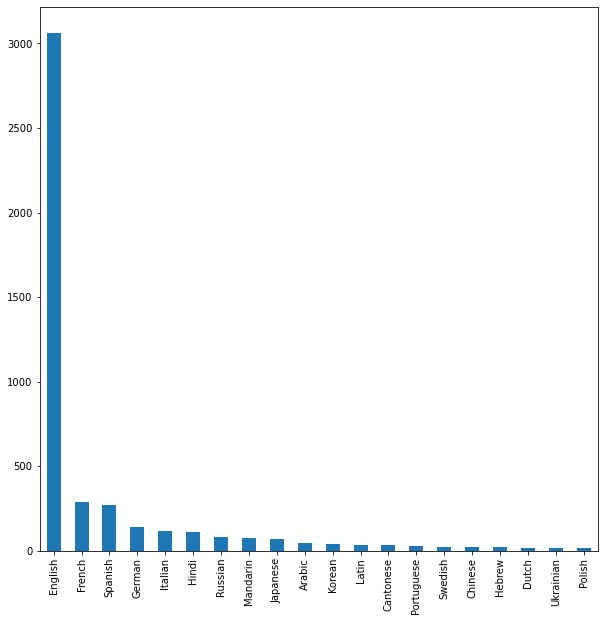

In [18]:
plot_column('Language',20)

In [19]:
languages=top('Language')
    
for language in languages[:20]:
    dataset["Language:"+language] = [int(language in d.split(',')) for d in dataset.Language]
    
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Language:Korean,Language:Latin,Language:Cantonese,Language:Portuguese,Language:Swedish,Language:Chinese,Language:Hebrew,Language:Dutch,Language:Ukrainian,Language:Polish
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

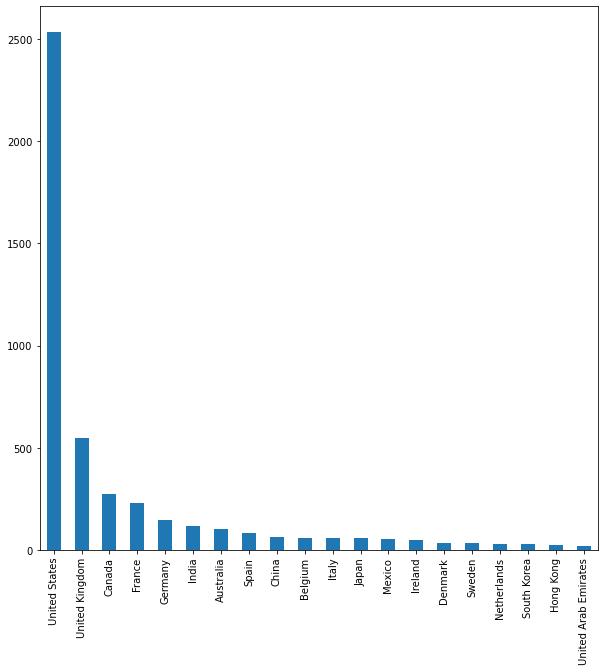

In [20]:
plot_column('Country',20)

In [21]:
countries=top('Country')
    
for country in countries[:20]:
    dataset["Country:"+country] = [int(country in d.split(',')) for d in dataset.Country]
    
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [22]:
dataset.to_csv('modified_dataset.csv')

In [23]:
for i in range(dataset.shape[0]):
    dataset['Rotten Tomatoes'][i]=int(dataset['Rotten Tomatoes'][i].replace('%','')) 
dataset.head()

<ipython-input-23-0e4638026832>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Rotten Tomatoes'][i]=int(dataset['Rotten Tomatoes'][i].replace('%',''))


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
0,0,1,Inception,1,13+,8.8,87,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [24]:
rotten_tomatoes_mean = dataset['Rotten Tomatoes'].mean()
dataset['Rotten Tomatoes']=pd.to_numeric(dataset['Rotten Tomatoes'],errors='coerce')
for i in range(dataset.shape[0]):
    if dataset['Rotten Tomatoes'][i]<=runtime_mean:
        dataset['Rotten Tomatoes'][i]=0
    else:
        dataset['Rotten Tomatoes'][i]=1

<ipython-input-24-556c4e0bd8f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Rotten Tomatoes'][i]=0


In [25]:
imdb_mean = dataset['IMDb'].mean()
dataset['IMDb']=pd.to_numeric(dataset['IMDb'],errors='coerce')
for i in range(dataset.shape[0]):
    if dataset['IMDb'][i]<=imdb_mean:
        dataset['IMDb'][i]=0
    else:
        dataset['IMDb'][i]=1

<ipython-input-25-542195021de4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['IMDb'][i]=1
<ipython-input-25-542195021de4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['IMDb'][i]=0


In [26]:
del dataset['Age']
del dataset['Directors']
del dataset['Genres']
del dataset['Country']
del dataset['Language']
del dataset['ID']
dataset_with_title = dataset.copy()
del dataset['Title']
dataset.head()

,Unnamed: 0,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
0,0,1,1.0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1.0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1.0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1.0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1.0,0,1,0,1,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
dataset.describe()

,Unnamed: 0,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
count,3301.000000,3301.000000,3301.000000,3301.0,3301.000000,3301.000000,3301.000000,3301.000000,3301.0,3301.000000,...,3301.000000,3301.000000,3301.000000,3301.000000,3301.00000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000
mean,5239.267798,0.871251,0.524387,0.0,0.302939,0.129658,0.545895,0.101181,0.0,0.425023,...,0.017570,0.017267,0.015753,0.014541,0.01030,0.009694,0.008785,0.008179,0.007876,0.005453
std,4479.389204,0.334973,0.499481,0.0,0.459598,0.335977,0.497965,0.301615,0.0,0.494421,...,0.131404,0.130286,0.124537,0.119724,0.10098,0.097995,0.093331,0.090083,0.088412,0.073653
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1298.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4781.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6519.000000,1.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16705.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


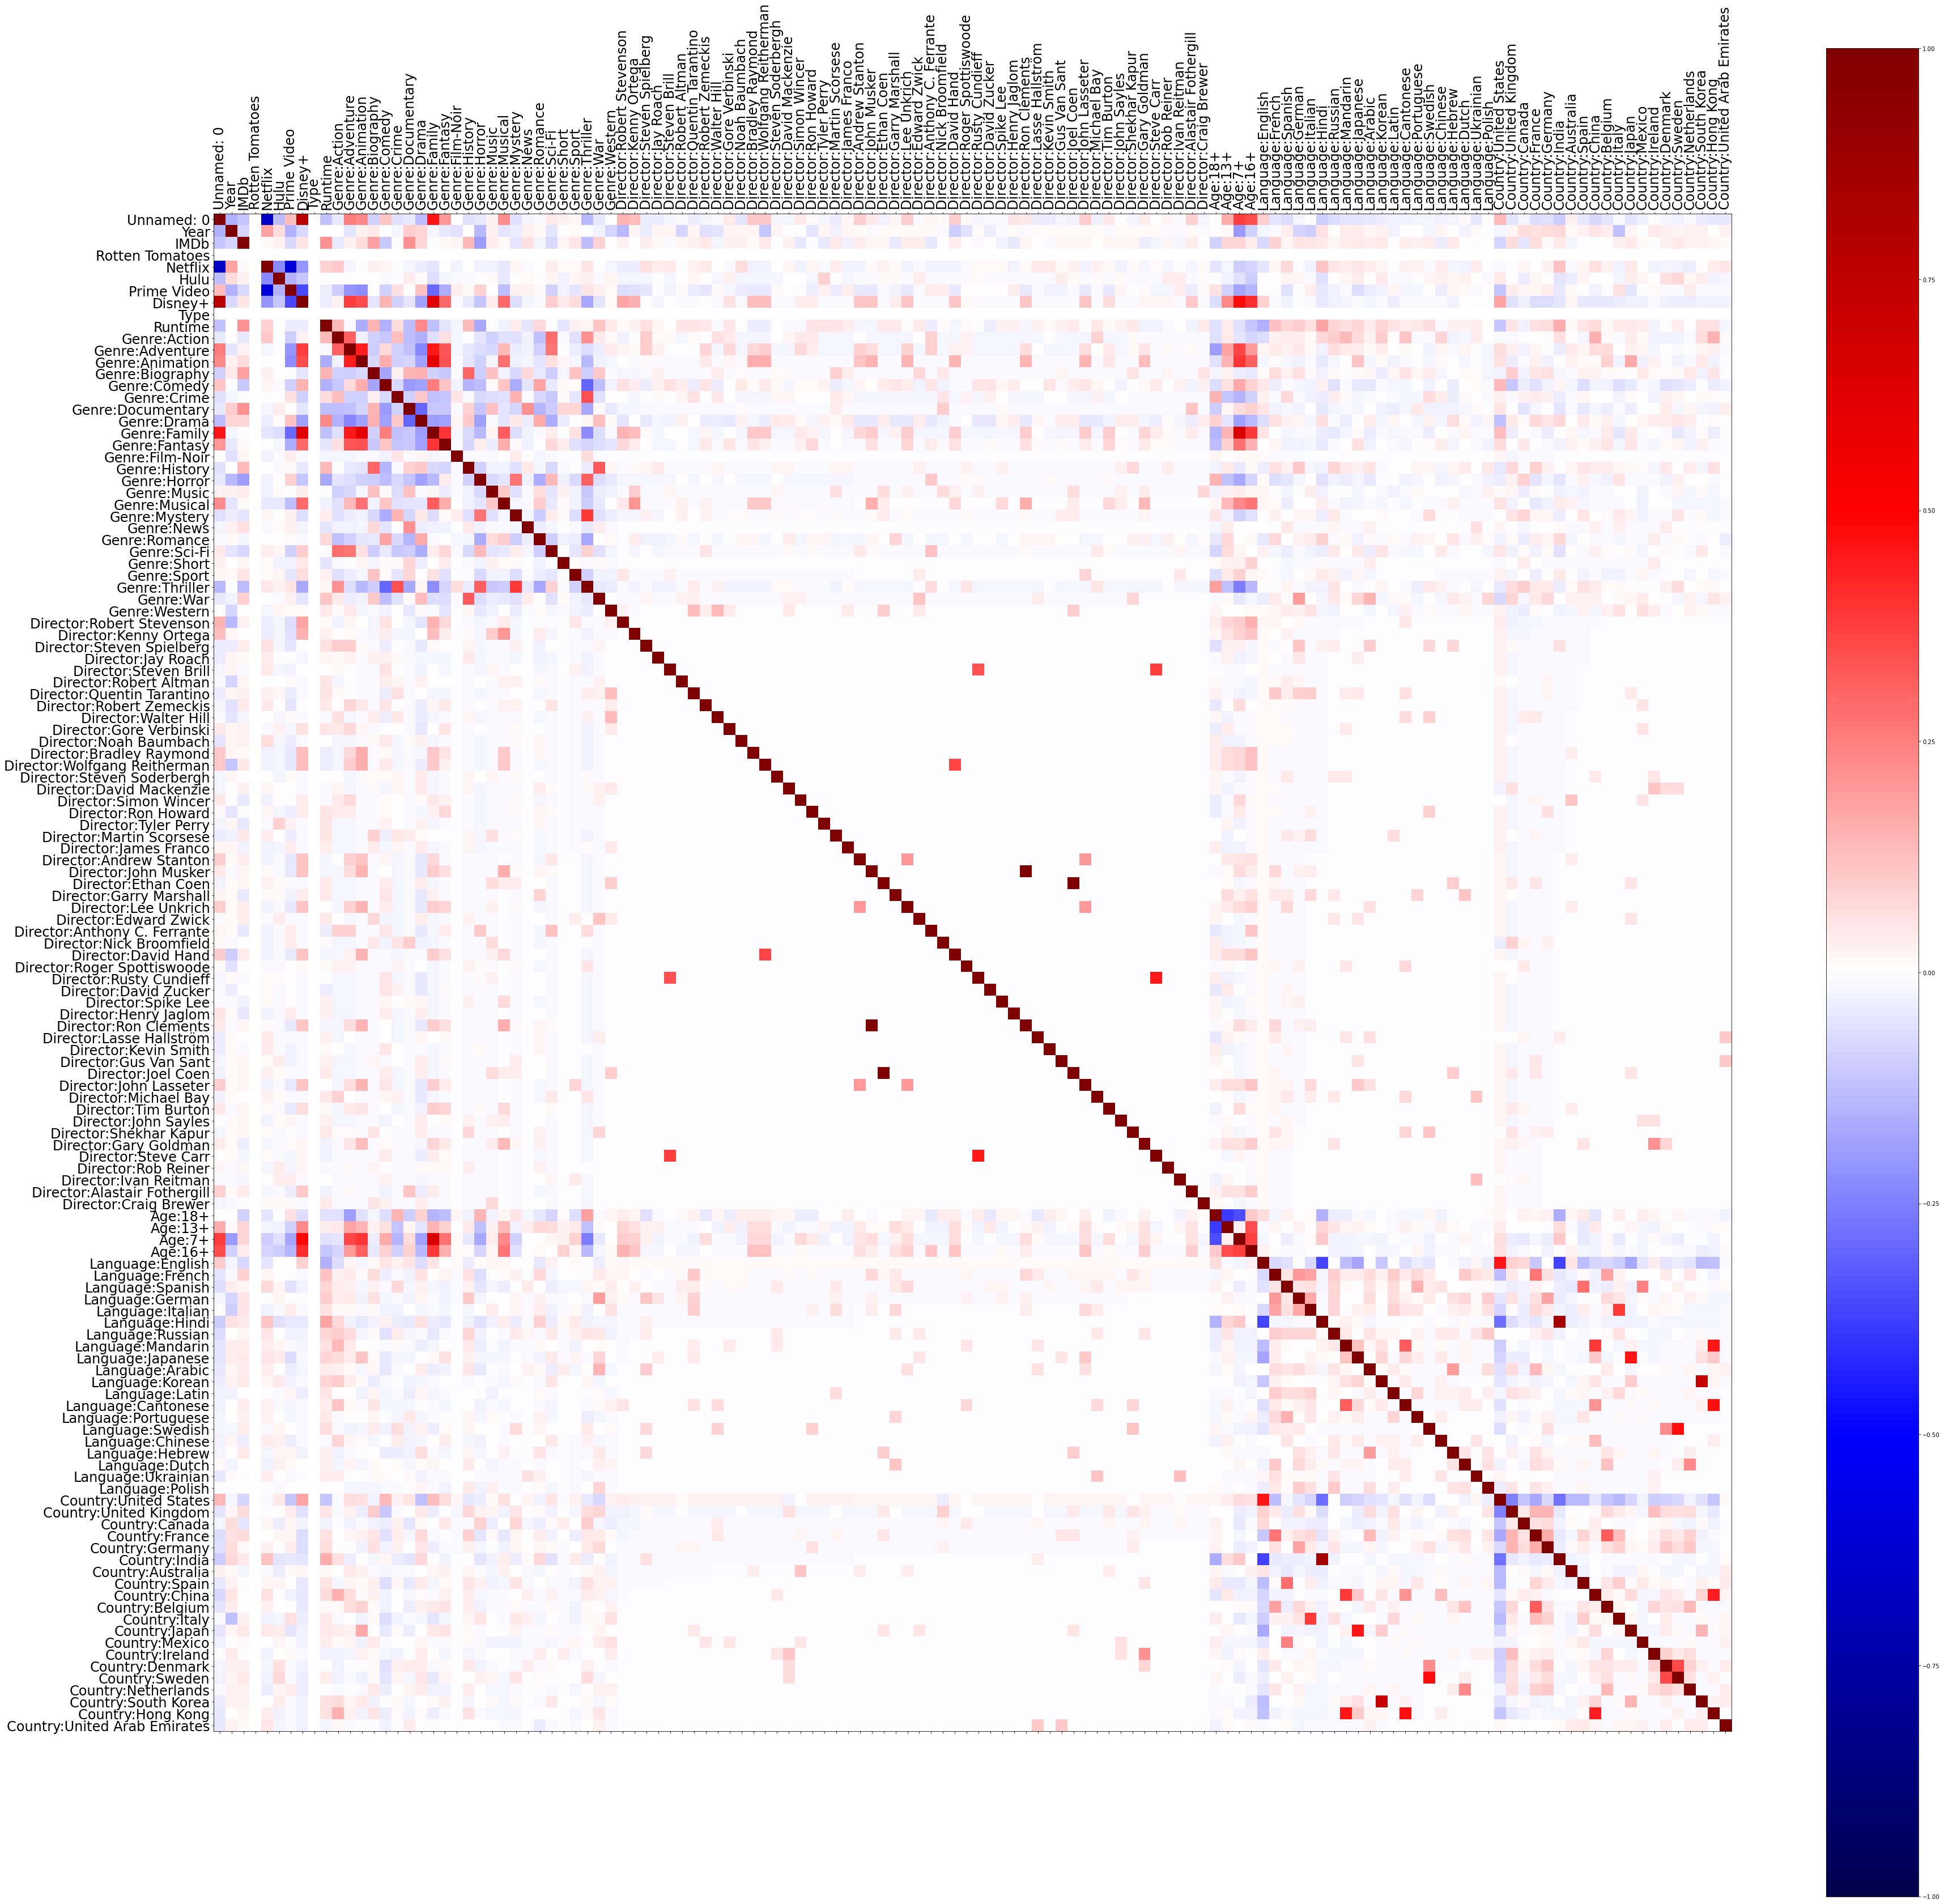

In [28]:
corr = dataset.corr()
fig = plt.figure(figsize=(60,60))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='seismic', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns, fontsize = 24)
ax.set_yticklabels(dataset.columns, fontsize = 24)
plt.show()

In [28]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(dataset)
kmeans.predict(dataset)

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
print("----Labels:----")
print(labels)
# print("----Cluters:----")
# print(clusters)

----Labels:----
[1 1 1 ... 0 0 0]


In [30]:
davies_bouldin_score = davies_bouldin_score(dataset, labels)
print(davies_bouldin_score)

0.40353302392073526


In [31]:
#elbow algorithm
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters = kl.elbow
print(num_clusters)

3


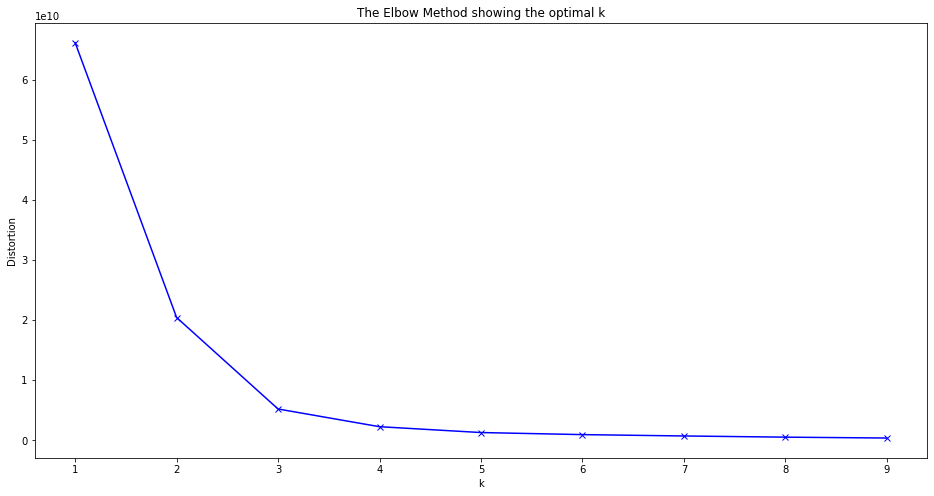

In [32]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [33]:
#silhouette algorithm
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
K = range(2,11)
scores = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    scores.append(score)
    silhouette_coefficients.append(score)

num_clusters = silhouette_coefficients.index(max(silhouette_coefficients)) + 2
print(score)
print(num_clusters)

0.6306399542658429
2


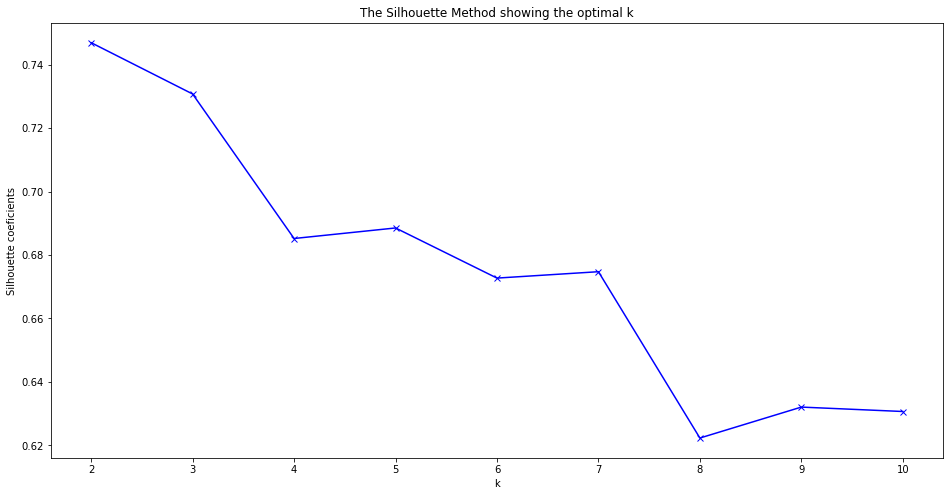

In [34]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette_coefficients, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette coeficients')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

### Redukcija dimenzionalnosti

In [35]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)

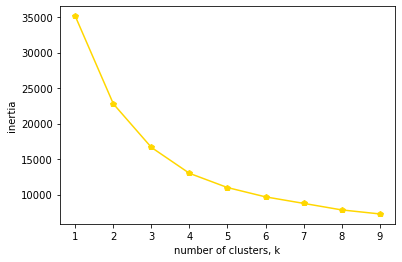

In [36]:
X_std = StandardScaler().fit_transform(dataset)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()


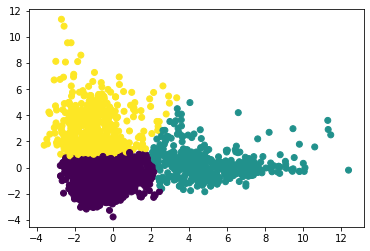

In [37]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

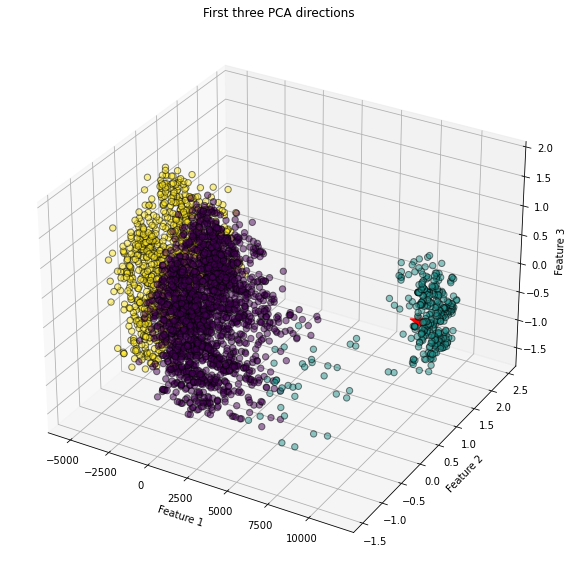

In [38]:
pca_ = PCA(n_components=3)
X_Demo_fit_pca = pca_.fit_transform(dataset)

kmeans_PCA = KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 3)

y_kmeans_PCA = kmeans_PCA.fit_predict(X_Demo_fit_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Demo_fit_pca[:,0],X_Demo_fit_pca[:,1],X_Demo_fit_pca[:,2], 
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("First three PCA directions")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

### PCA

In [39]:
scaler = StandardScaler().fit(dataset)
df_matrix = scaler.transform(dataset)
print(df_matrix)

[[-1.16981609  0.38441473  0.95236032 ... -0.09081185 -0.08910068
  -0.07404587]
 [-1.16959281  0.38441473  0.95236032 ... -0.09081185 -0.08910068
  -0.07404587]
 [-1.16936953  0.38441473  0.95236032 ... -0.09081185 -0.08910068
  -0.07404587]
 ...
 [ 2.5538002   0.38441473 -1.05002275 ... -0.09081185 -0.08910068
  -0.07404587]
 [ 2.55603299  0.38441473 -1.05002275 ... -0.09081185 -0.08910068
  -0.07404587]
 [ 2.560052    0.38441473 -1.05002275 ... -0.09081185 -0.08910068
  -0.07404587]]


In [40]:
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca_top = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum_top=sum(pca_top.explained_variance_ratio_)
print (sum_top/sumall)

24
['0.04', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.3600978866715039


In [41]:
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca_top = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum_top=sum(pca_top.explained_variance_ratio_)
print (sum_top/sumall)

24
['0.04', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.35825051730415014


In [42]:
first_comp = pca_top.components_[0]
first_comps = pd.DataFrame(list(zip(first_comp, dataset.columns)), columns=['weights', 'features'])
first_comps['abs_weights']=first_comps['weights'].apply(lambda x: np.abs(x))
first_comps.sort_values('abs_weights', ascending=False,inplace=True)

Top_features=first_comps
Top_features

,weights,features,abs_weights
18,3.625595e-01,Genre:Family,3.625595e-01
7,3.539139e-01,Disney+,3.539139e-01
86,3.074561e-01,Age:7+,3.074561e-01
0,2.932126e-01,Unnamed: 0,2.932126e-01
12,2.840740e-01,Genre:Animation,2.840740e-01
...,...,...,...
69,-2.140030e-03,Director:Lasse Hallström,2.140030e-03
96,-1.760840e-03,Language:Japanese,1.760840e-03
103,-5.364658e-04,Language:Chinese,5.364658e-04
8,-5.558843e-19,Type,5.558843e-19


### DBScan Clustering

In [43]:
Xpca=pca_top.transform(df_matrix)

for eps in [3,4,5,6,7,8,9,10,11,12,13,14,15]:
    for min_samples in range(1,25):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(Xpca)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(Xpca, db.labels_, metric='euclidean')))

3 2: -0.1354681749051016
3 3: -0.09160455409472198
3 4: -0.009870729879820954
3 5: -0.015465003680819574
3 6: 0.04027748283245223
3 7: 0.042522497206465525
3 8: 0.04856470174811512
3 9: 0.047385159798331765
4 2: 0.0023724321775522397
4 3: 0.023437592496294252
4 4: 0.025712383537429908
4 5: 0.030409506603315255
4 6: 0.0579523119926839
4 7: 0.02087006736479007
4 8: 0.026089088173329545
4 9: 0.030923177608566527
5 1: 0.02630886003650869
5 2: 0.10967694284931696
5 3: 0.12374171822660765
5 4: 0.13993211100322045
5 5: 0.17609119096748785
5 6: 0.2012660954035903
5 7: 0.20167924714843874
5 8: 0.20216099570446452
5 9: 0.20178545466312936
6 1: 0.1570527518203193
6 2: 0.22299171086783062
6 3: 0.22010738256995266
6 4: 0.21922459640639805
6 5: 0.22251962648945683
6 6: 0.2246706270780261
6 7: 0.2237026362240008
6 8: 0.22479677517877786
6 9: 0.22141160152540615
6 10: 0.22044706544347004
6 11: 0.2127719387681967
7 1: 0.24501845766795854
7 2: 0.3910004720550683
7 3: 0.41169641551424135
7 4: 0.413738770

Estimated number of clusters: 3
Estimated number of noise points: 2
Silhouette Coefficient: 0.783


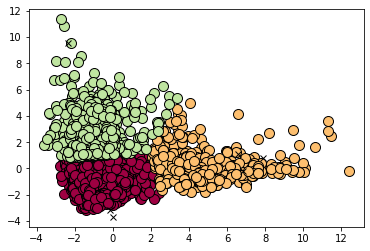

In [80]:
db = DBSCAN(eps=15, min_samples=5).fit(Xpca)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)
n_noise = list(dbscanlabels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xpca, dbscanlabels))

unique_labels = set(dbscanlabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
     
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Xpca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = Xpca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()

In [81]:
#Performing Clustering with DBSCAN

db = DBSCAN(eps=5, min_samples=5).fit(Xpca)
y = DBSCAN(eps=5, min_samples=5).fit_predict(Xpca)
dbscanlabels= db.labels_

print(np.unique(y))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [82]:
movie_name = dataset_with_title.Title
y
i, = np.where(y ==5)
print(i)
print(len(i))
print(movie_name[i])


[ 283  513  756  769  839  912 1385 1815]
8
283                      Adam Sandler: 100% Fresh
513     Middle School: The Worst Years of My Life
756                               Drillbit Taylor
769                                   The Do-Over
839                                  Sandy Wexler
912                         Tales from the Hood 2
1385                                       Sprung
1815                          Fear of a Black Hat
Name: Title, dtype: object


In [83]:
films_dbscan = { 'title': list(dataset_with_title.Title), 'rank': np.arange(0,3301,1), 'cluster': dbscanlabels}

frame_dbscan = pd.DataFrame(films_dbscan, index = [dbscanlabels] , columns = ['rank', 'title', 'cluster'])

frame_dbscan['cluster'].value_counts() 

 0     2943
-1      263
 7       14
 3       10
 4       10
 2        9
 5        8
 13       7
 10       6
 6        6
 11       5
 9        5
 1        5
 12       5
 8        5
Name: cluster, dtype: int64

### K-Means

In [84]:
km=MiniBatchKMeans(n_clusters=5,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  verbose=False)
km_model=km.fit(Xpca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Xpca, kmeanlabels))

Silhouette Coefficient: 0.263


In [85]:
films_kmeans = { 'title': list(dataset_with_title.Title), 'rank': np.arange(0,3301,1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])

frame_kmeans['cluster'].value_counts() 

2    2715
0     475
4     101
3       5
1       5
Name: cluster, dtype: int64

In [107]:
print("Top terms per cluster:")
print()

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(5):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :10]: 
        print(' %s' % Top_features['features'].iloc[ind], end=',')
    print() 
    print() 
    
    print("Cluster %d titles:" % i, end='')
    counter=0
    for p in range(0,3301):
        if frame_kmeans.iloc[p]['cluster']==i and counter<10:
            print('%s' % frame_kmeans.iloc[p]['title'], end=',')
            counter+=1
    print() 
    print() 


Top terms per cluster:

Cluster 0 words: Genre:Family, Unnamed: 0, Disney+, Age:7+, Director:John Musker, Genre:Adventure, Age:13+, Prime Video, Genre:Animation, Genre:Musical,

Cluster 0 titles:Back to the Future,Spider-Man: Into the Spider-Verse,Incredibles 2,Klaus,Despicable Me,Back to the Future Part II,Willy Wonka & the Chocolate Factory,Back to the Future Part III,Song of the Sea,Tarzan,

Cluster 1 words: Genre:Adventure, Age:16+, Genre:Thriller, Genre:Animation, Age:13+, Genre:Crime, Disney+, Country:United States, Prime Video, Director:Ron Clements,

Cluster 1 titles:The Ballad of Buster Scruggs,A Serious Man,Hail, Caesar!,True Grit,Inside Llewyn Davis,

Cluster 2 words: Genre:Animation, Unnamed: 0, Genre:Comedy, Director:Wolfgang Reitherman, Genre:Fantasy, Genre:Musical, Country:United States, Runtime, Age:18+, Director:Ron Clements,

Cluster 2 titles:Inception,The Matrix,Avengers: Infinity War,The Good, the Bad and the Ugly,The Pianist,Django Unchained,Raiders of the Lost Ark